In [ ]:
%pip install pandas
%pip install matplotlib
%pip install numpy
%pip install seaborn

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

In [ ]:
df = pd.read_csv("high_diamond_ranked_10min.csv")
df.head()

In [ ]:
df.info()


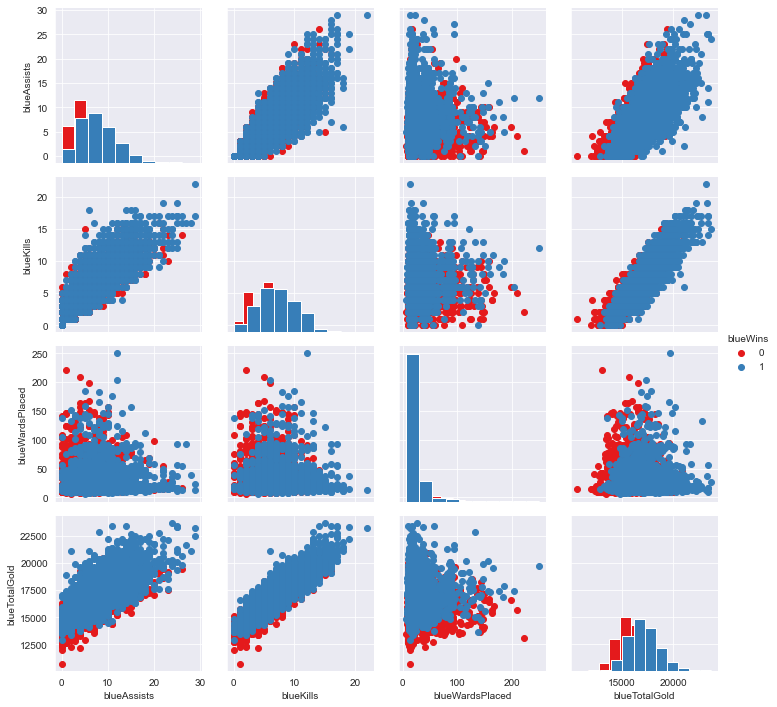

In [26]:
g = sns.PairGrid(data=df, vars=[
                 'blueAssists', 'blueKills', 'blueWardsPlaced', 'blueTotalGold'], hue='blueWins', palette='Set1')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
